In [33]:

import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load data into data frame
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

df = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
df.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


In [35]:
# Dropping irrelevent features (explanation in Notion)
df = df.drop(
    ['eventAction', 'eventSpeedChange', 'payloadCreation',
     'validity_mean', 'init_time', 'eventStart', 'eventEnd', 'eventStartLatitude',
     'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude'],
    axis=1
)

df.columns.to_list()

['eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [36]:
numeric_features = [ 
    'eventSampleSpeed',
    'eventStartSpeed',
    'eventEndSpeed',
    'eventDurationSeconds',
    'eventMilesDriven',
    'eventGPSSignalStrength'
]

df[numeric_features].describe()

,eventSampleSpeed,eventStartSpeed,eventEndSpeed,eventDurationSeconds,eventMilesDriven,eventGPSSignalStrength
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000
mean,15.616635,15.287629,16.974019,4.954434,0.022619,6.818543
std,15.057503,19.745252,14.044510,3.088469,0.025124,8.378248
min,5.001024,-2.236940,-2.236940,0.914496,0.000000,2.000000
25%,9.713930,8.131329,11.164708,2.958125,0.010235,4.740406
50%,13.658226,13.314892,15.510978,4.655649,0.016879,4.756594
75%,18.821297,19.834566,20.721055,6.152793,0.027195,7.059539
max,1307.922100,2618.081300,1221.429100,24.980251,1.908790,477.784180


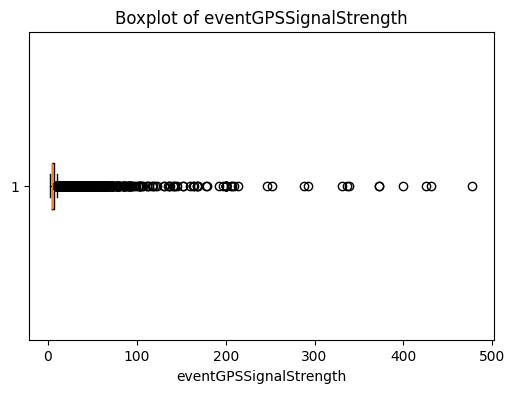

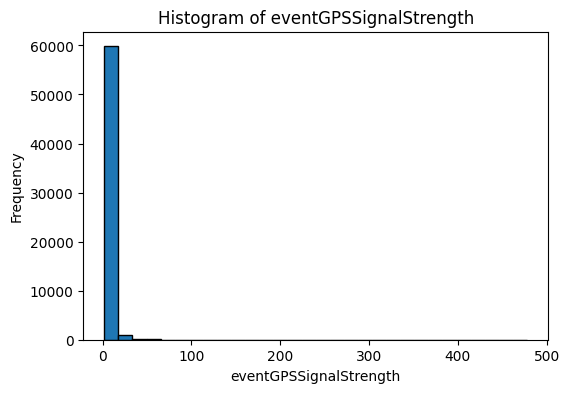

In [37]:
plt.figure(figsize=(6,4))
plt.boxplot(df['eventGPSSignalStrength'], vert=False)
plt.title(f'Boxplot of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventGPSSignalStrength'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.ylabel('Frequency')
plt.show()

In [38]:
print(df[df['eventGPSSignalStrength'] >= 50].shape)
print(df[df['eventGPSSignalStrength'] >= 50].shape[0] / df.shape[0] * 100, "% of data has GPS signal strength >= 50"
)

(202, 23)
0.33063803319474905 % of data has GPS signal strength >= 50


In [39]:
print(df[df['eventGPSSignalStrength'] >= 10].shape)
print(df[df['eventGPSSignalStrength'] >= 10].shape[0] / df.shape[0] * 100, "% of data has GPS signal strength >= 10"
)
#Both code blocks show that IOS is more accurate than android

(11842, 23)
19.383245490555538 % of data has GPS signal strength >= 10


In [40]:
df[df['eventGPSSignalStrength'] >= 100].head(100)

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius
294,4.0,7.369243,4.964813,0.082421,0.0,120.234634,8.148892,6.589593,0.170176,1.857311,...,4.353059,0.665794,0.665794,0.665794,13.595727,1.056379,117.638300,5.286681,21.629572,1.665837e+01
5367,5.0,490.133880,0.958000,0.300343,0.0,246.332800,469.511320,510.756440,0.103927,0.177731,...,0.232831,275.073360,275.073360,275.073360,9.558548,0.068656,149.378680,0.068513,939.056760,7.571752e+02
8507,5.0,11.982542,1.965500,0.004159,0.0,287.745330,11.296548,12.325540,0.089633,0.225804,...,0.868162,0.980441,1.487324,1.487324,7.870134,1.470731,32.344063,2.949716,72.389046,3.096411e+01
9973,4.0,17.738483,1.965305,0.018780,0.0,200.000000,16.753328,18.231060,0.333768,0.572142,...,1.811458,1.038599,4.001708,4.001708,17.424393,2.031513,42.206654,4.074023,189.307750,5.400354e+01
9979,4.0,21.312592,0.962604,0.013939,0.0,192.707340,22.067701,20.557478,4.346096,5.107457,...,14.511696,2.809812,2.809812,2.809812,11.433739,0.307567,33.337086,0.308402,152.177190,3.651345e+01
10009,5.0,58.529385,2.955656,0.228560,0.0,159.540800,54.088604,69.658310,5.611588,9.602743,...,12.963774,8.154250,17.144709,17.144709,11.537152,0.180846,89.999080,0.541742,284.455320,1.097665e+02
10013,5.0,67.309525,0.958586,0.258675,0.0,177.489640,62.388256,72.230800,1.741042,3.116069,...,14.993161,11.508461,11.508461,11.508461,17.237534,22.421460,44.602760,22.388435,12.385109,8.429888e+01
10014,5.0,35.507256,1.957110,0.065720,0.0,213.870790,35.862328,35.544975,1.880281,2.648449,...,14.047752,3.537830,11.763144,11.763144,9.235811,10.426672,60.117214,20.822590,58.378456,6.964710e+01
10015,4.0,82.129250,2.955641,0.029890,0.0,167.644790,97.664800,70.888626,1.317865,2.282434,...,19.997270,3.987226,4.999118,4.999118,7.017790,20.216350,26.718592,60.559730,11.815573,3.611793e+02
10016,5.0,116.969590,0.958586,0.148214,0.0,151.445040,116.969590,116.969590,3.488818,3.918879,...,17.877651,14.118838,14.118838,14.118838,26.405891,7.088834,30.941975,7.078392,278.824650,3.252578e+02


In [41]:
df = df[df['eventGPSSignalStrength'] <= 50]

In [42]:
df.shape

(60900, 23)

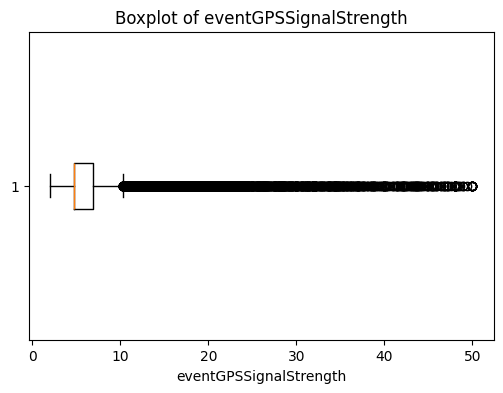

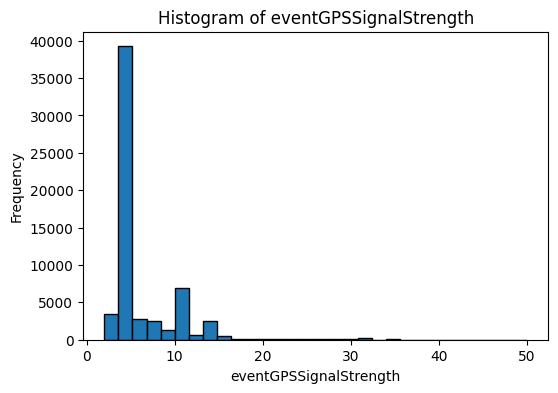

In [43]:
plt.figure(figsize=(6,4))
plt.boxplot(df['eventGPSSignalStrength'], vert=False)
plt.title(f'Boxplot of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventGPSSignalStrength'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.ylabel('Frequency')
plt.show()